<a href="https://colab.research.google.com/github/YomnaAhmed97/Strock-Prediction-Pyspark/blob/main/Storck_Prediction_Using_Pyspark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![image.png](attachment:image.png)

## Objective:
- The objective from this project is to create a <b>Logistic Regression Classifier</b> to predict the <b>Stroke Condition</b>.
- <b>Stoke</b> is a condition in which either the blood flow to the brain stops or blood flow is excessive.
- It is required to obtain <b>ROC > 0.65</b>.

### Data:
- Data is provided in csv format in a file named <b>healthcare-dataset-stroke-data.csv</b>

### Column names and data types are as follow:
- id, integer.
- gender, string.
- age, double.
- hypertension, integer.
- heart_disease, integer.
- ever_married, string.
- work_type, string.
- Residence_type, string.
- avg_glucose_level, double.
- bmi, double.
- smoking_status, string.
- stroke, integer <b>(Target Label)</b>.
If the person has stroke the stroke label value is <b>"1"</b> otherwise <b>"0"</b>.

## To perform this task follow the following guiding steps:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Create a spark session and import the required libraries

In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

### Create a data schema programatically

In [ ]:
from pyspark.sql.types import *
schema = StructType([
  StructField("id", IntegerType(), True),
  StructField("gender", StringType(), True),
  StructField("age", DoubleType(), True),
  StructField("hypertension", IntegerType(), True),
  StructField("heart_disease", IntegerType(), True),
  StructField("ever_married", StringType(), True),
  StructField("work_type", StringType(), True),
  StructField("Residence_type", StringType(), True),
  StructField("avg_glucose_level", DoubleType(), True),
  StructField("bmi", DoubleType(), True),
  StructField("smoking_status", StringType(), True),
  StructField("stroke", IntegerType(), True)])

### Read the data using the standard DataReader (Key,Value) pairs format
- Provide the schema and any other required options.

In [ ]:
df=spark.read.csv("/content/drive/MyDrive/Colab Notebooks/healthcare-dataset-stroke-data.csv",schema=schema,header=True)

### Explore the data 
#### You have to do the following:
- Print the Schema.
- Show the first 10 rows from the data.
- Explore null values and show how many null values in each column.
- Plot a count plot for the target label and <b>notice the graph</b>.
- Perform any additional EDA you find useful.

In [ ]:
# Print the Schema
df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- age: double (nullable = true)
 |-- hypertension: integer (nullable = true)
 |-- heart_disease: integer (nullable = true)
 |-- ever_married: string (nullable = true)
 |-- work_type: string (nullable = true)
 |-- Residence_type: string (nullable = true)
 |-- avg_glucose_level: double (nullable = true)
 |-- bmi: double (nullable = true)
 |-- smoking_status: string (nullable = true)
 |-- stroke: integer (nullable = true)



In [ ]:
# Show the first 10 rows from the data
df.show(10)

+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
|   id|gender| age|hypertension|heart_disease|ever_married|    work_type|Residence_type|avg_glucose_level| bmi| smoking_status|stroke|
+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
| 9046|  Male|67.0|           0|            1|         Yes|      Private|         Urban|           228.69|36.6|formerly smoked|     1|
|51676|Female|61.0|           0|            0|         Yes|Self-employed|         Rural|           202.21|null|   never smoked|     1|
|31112|  Male|80.0|           0|            1|         Yes|      Private|         Rural|           105.92|32.5|   never smoked|     1|
|60182|Female|49.0|           0|            0|         Yes|      Private|         Urban|           171.23|34.4|         smokes|     1|
| 1665|Female|79.0|           1|            0|         

In [ ]:
# Explore null values and show how many null values in each column
from pyspark.sql.functions import isnan, when, count, col

df.select([count(when(isnan(i) | col(i).isNull(), i)).alias(i) for i in df.columns]).show()
# There is null values in bmi coloum

+---+------+---+------------+-------------+------------+---------+--------------+-----------------+---+--------------+------+
| id|gender|age|hypertension|heart_disease|ever_married|work_type|Residence_type|avg_glucose_level|bmi|smoking_status|stroke|
+---+------+---+------------+-------------+------------+---------+--------------+-----------------+---+--------------+------+
|  0|     0|  0|           0|            0|           0|        0|             0|                0|201|             0|     0|
+---+------+---+------------+-------------+------------+---------+--------------+-----------------+---+--------------+------+



In [ ]:
df.select('stroke').groupby('stroke').count().show()

+------+-----+
|stroke|count|
+------+-----+
|     1|  249|
|     0| 4861|
+------+-----+



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


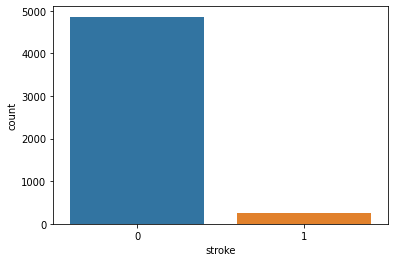

In [ ]:
# Plot a count plot for the target label and notice the graph
import seaborn as sns

sns.countplot(df.select('stroke').toPandas()['stroke'])

Perform any additional EDA you find useful.
From exploring the data, the data is unbalanced.

In [ ]:
# Perform any additional EDA you find useful.
# From exploring the data, the data is unbalanced.

### Get the summary statistics of the age column
- You will find the minimum age is about <b>0.08</b>.
- Remove rows for the age below <b>2 years old</b>.

In [ ]:
# You will find the minimum age is about 0.08
df.select('age').describe().show()

+-------+------------------+
|summary|               age|
+-------+------------------+
|  count|              5110|
|   mean|43.226614481409015|
| stddev| 22.61264672311348|
|    min|              0.08|
|    max|              82.0|
+-------+------------------+



In [ ]:
# Remove rows for the age below 2 years old
df=df.filter('age >=2')

In [ ]:
#df=df.filter('age >=2').show()

### Working with gender & smoking_status columns:
- Select and show the gender & smoking_status columns
- Get the distinct values for each column.

In [ ]:
# Select and show the gender & smoking_status columns
df.select('gender','smoking_status').show()

+------+---------------+
|gender| smoking_status|
+------+---------------+
|  Male|formerly smoked|
|Female|   never smoked|
|  Male|   never smoked|
|Female|         smokes|
|Female|   never smoked|
|  Male|formerly smoked|
|  Male|   never smoked|
|Female|   never smoked|
|Female|        Unknown|
|Female|        Unknown|
|Female|   never smoked|
|Female|         smokes|
|Female|         smokes|
|  Male|        Unknown|
|Female|   never smoked|
|Female|   never smoked|
|  Male|         smokes|
|  Male|         smokes|
|Female|   never smoked|
|  Male|        Unknown|
+------+---------------+
only showing top 20 rows



In [ ]:
# Get the distinct values for each column
df.select('gender').distinct().show()

+------+
|gender|
+------+
|Female|
| Other|
|  Male|
+------+



In [ ]:
df.select('smoking_status').distinct().show()

+---------------+
| smoking_status|
+---------------+
|         smokes|
|        Unknown|
|   never smoked|
|formerly smoked|
+---------------+



#### Change the string values of the columns into numerical values as follow:
1. Gender column:
    * Male = 1 
    * Female = 0 
    * Other = 0 
2. Smoking Status column:
  * never smoked = 0
  * Unknown = 0.5
  * formerly smoked = 0.75
  * smokes = 1.0


In [ ]:
from pyspark.sql.functions import *
gender_dic={'Male':1,'Female':0,'Other':0}
smoking_dic={'never smoked':0.0,'Unknown':0.5,'formerly smoked':0.75,'smokes':1.0}

In [ ]:
replace_gender=udf(lambda x : gender_dic[x],IntegerType())
replace_smoking=udf(lambda x : smoking_dic[x],DoubleType())
df=df.withColumn('gender',replace_gender('gender')).withColumn('smoking_status',replace_smoking('smoking_status'))

#### Show the output DataFrame
- Select and show the gender & smoking_status columns after value changing.
- Print schema for the new dataframe.

In [ ]:
# Select and show the gender & smoking_status columns after value changing & with print
df.select('gender','smoking_status').show()

+------+--------------+
|gender|smoking_status|
+------+--------------+
|     1|          0.75|
|     0|           0.0|
|     1|           0.0|
|     0|           1.0|
|     0|           0.0|
|     1|          0.75|
|     1|           0.0|
|     0|           0.0|
|     0|           0.5|
|     0|           0.5|
|     0|           0.0|
|     0|           1.0|
|     0|           1.0|
|     1|           0.5|
|     0|           0.0|
|     0|           0.0|
|     1|           1.0|
|     1|           1.0|
|     0|           0.0|
|     1|           0.5|
+------+--------------+
only showing top 20 rows



### Deal with null value according to your data analysis.

In [ ]:
# By using median imputer to avoid the influence of outliers in this column (see above distribution of bmi)
from pyspark.ml.feature import Imputer
median_imputer=Imputer(strategy='median',inputCol='bmi',outputCol='bmi')
df=median_imputer.fit(df).transform(df)

In [ ]:
df.select([count(when(isnan(i) | col(i).isNull(), i)).alias(i) for i in df.columns]).show()
# There is no null values

+---+------+---+------------+-------------+------------+---------+--------------+-----------------+---+--------------+------+
| id|gender|age|hypertension|heart_disease|ever_married|work_type|Residence_type|avg_glucose_level|bmi|smoking_status|stroke|
+---+------+---+------------+-------------+------------+---------+--------------+-----------------+---+--------------+------+
|  0|     0|  0|           0|            0|           0|        0|             0|                0|  0|             0|     0|
+---+------+---+------------+-------------+------------+---------+--------------+-----------------+---+--------------+------+



### Split the data into training and test dataframes:
- 80% training and 20% test.
- seed = 42.
- Save each dataframe as a parquet file

In [ ]:
train_df,test_df=df.randomSplit([0.8,0.2],seed=42)

### Read the saved Train and Test DataFrame:
- Use the dataframes you read in the subsequent steps.

In [ ]:
train_df.show()

+---+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+--------------+------+
| id|gender| age|hypertension|heart_disease|ever_married|    work_type|Residence_type|avg_glucose_level| bmi|smoking_status|stroke|
+---+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+--------------+------+
| 67|     0|17.0|           0|            0|          No|      Private|         Urban|            92.97|28.2|          0.75|     0|
| 77|     0|13.0|           0|            0|          No|     children|         Rural|            85.81|18.6|           0.5|     0|
| 91|     0|42.0|           0|            0|          No|      Private|         Urban|            98.53|18.5|           0.0|     0|
| 99|     0|31.0|           0|            0|          No|      Private|         Urban|           108.89|52.3|           0.5|     0|
|121|     0|38.0|           0|            0|         Yes|      Private|     

In [ ]:
test_df.show()

+----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+--------------+------+
|  id|gender| age|hypertension|heart_disease|ever_married|    work_type|Residence_type|avg_glucose_level| bmi|smoking_status|stroke|
+----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+--------------+------+
|  84|     1|55.0|           0|            0|         Yes|      Private|         Urban|            89.17|31.5|           0.0|     0|
| 129|     0|24.0|           0|            0|          No|      Private|         Urban|            97.55|26.2|           0.0|     0|
| 156|     0|33.0|           0|            0|         Yes|      Private|         Rural|            86.97|42.2|           0.0|     0|
| 205|     0|43.0|           0|            0|         Yes|      Private|         Rural|            88.23|37.6|           0.5|     0|
| 259|     1|79.0|           0|            0|         Yes|      Priva

### Create the model:
- Perform feature engineering steps.
- Create the logistic regression classifier.
- Build the pipeline model that uses all feature engineering steps and the model.
- Train the pipeline model using the trainig dataset.

In [ ]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder,VectorAssembler
from pyspark.ml import Pipeline

str_cols=[i for i,t in train_df.dtypes if t=='string']
index_cols=[i+'_index' for i in str_cols]
OHE_cols=[i+'_OHE' for i in str_cols]

string_indexer=StringIndexer(inputCols=str_cols,outputCols=index_cols,handleInvalid='skip')
OHE=OneHotEncoder(inputCols=index_cols,outputCols=OHE_cols)

In [ ]:
num_cols=[i for i,t in train_df.dtypes if (t!='string')&(i not in ['id','stroke'])]

In [ ]:
num_cols

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'smoking_status']

In [ ]:
vector_cols=num_cols+OHE_cols
vector_cols

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'ever_married_OHE',
 'work_type_OHE',
 'Residence_type_OHE']

In [ ]:
vectorAss=VectorAssembler(inputCols=vector_cols,outputCol='features')

In [ ]:
# Create the final data
from pyspark.ml.classification import LogisticRegression
lr_model = LogisticRegression(featuresCol='features',labelCol='stroke')

In [ ]:
pipeline = Pipeline(stages=[string_indexer,OHE,vectorAss,lr_model])

### Perform predictions on tests dataframe:
- Test the model using the test dataframe
- Select and show the feature column.
- Print the schema of the output dataframe.
- Select and show both prediction and label columns.
- Explore the results for the label column stroke=1. i.e. select both columns (prediction,stroke) for stroke=1.<b>notice the result.</b> 
- Count the predicted 1 and 0 values.<b>notice the result.</b>   

In [ ]:
pred = pipeline.fit(train_df).transform(test_df)

In [ ]:
pred.select('prediction').groupby('prediction').count().show()
# After notice the result: The model predict only the major class due to imbalanced data


+----------+-----+
|prediction|count|
+----------+-----+
|       0.0|  953|
+----------+-----+



### Evaluate the model performance
- Use <b>BinaryClassificationEvaluator</b>. This will calculate the <b>ROC</b>.
- Set the parameters as follow:
    - <b>rawPredictionCol='prediction'</b> and <b>labelCol='stroke'</b>

In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [ ]:
evaluatorROC = BinaryClassificationEvaluator(rawPredictionCol='prediction'
                                             ,labelCol='stroke')

In [ ]:
evaluatorROC.evaluate(pred)

0.5

### Improve Model Performance
- You may noticed that <b>the target label is imbalanced</b>.
- LogisticRegression classifier has a special parameter <b>weightCol</b> to deal with imbalanced class.
- In order to use this parameter you must have a <b>weightCol</b> in your training dataframe.
- In order to create this column you will need to define a <b>UDF</b> and apply it to the target label column.
- Create a LogisticRegression classifier with <b>weightCol</b> parameter.
- Build and train a pipeline model with the new LogisticRegression.
- Perform the prediction on the test dataframe. 
- Select and show both prediction and label columns.
- Explore the results for the label column stroke=1. i.e. select both columns (prediction,stroke) for stroke=1.<b>notice the result.</b> 
- Count the predicted 1 and 0 values.<b>notice the result.</b>   
- Evaluate the model performance exactly as in the previous step.
### YOU SHOULD OBTAIN  ROC > 0.65
<BR>
<b><font color='red'>Note: feel free to deal with the imbalanced cluster with the above method or another. However, you can only use methods applied on SPARK DATAFRAME</font></b>

In [ ]:
count1=train_df.select('stroke').groupby('stroke').count().filter('stroke==1').head()[1]
count0=train_df.select('stroke').groupby('stroke').count().filter('stroke==0').head()[1]
r1=count1/(count1+count0)
r0=count0/(count1+count0)

dic={0:r1,1:r0}

In [ ]:
imbalanced=udf(lambda x :dic[x],DoubleType())
train_df2=train_df.withColumn('weight',imbalanced('stroke'))

In [ ]:
train_df2.select('stroke','weight').show()

+------+-------------------+
|stroke|             weight|
+------+-------------------+
|     0|0.05003715630418628|
|     0|0.05003715630418628|
|     0|0.05003715630418628|
|     0|0.05003715630418628|
|     0|0.05003715630418628|
|     0|0.05003715630418628|
|     0|0.05003715630418628|
|     0|0.05003715630418628|
|     0|0.05003715630418628|
|     0|0.05003715630418628|
|     1| 0.9499628436958137|
|     0|0.05003715630418628|
|     0|0.05003715630418628|
|     0|0.05003715630418628|
|     0|0.05003715630418628|
|     0|0.05003715630418628|
|     0|0.05003715630418628|
|     0|0.05003715630418628|
|     0|0.05003715630418628|
|     0|0.05003715630418628|
+------+-------------------+
only showing top 20 rows



In [ ]:
lr_model2=LogisticRegression(featuresCol='features',labelCol='stroke',maxIter=200,weightCol='weight')
pipeline2 = Pipeline(stages=[string_indexer,OHE,vectorAss,lr_model2])

In [ ]:
pred2 = pipeline2.fit(train_df2).transform(test_df)

In [ ]:
evaluatorROC = BinaryClassificationEvaluator(rawPredictionCol='prediction'
                                             ,labelCol='stroke')

In [ ]:
evaluatorROC.evaluate(pred2)

0.7757777671252577

# GOOD LUCK
<b><font color='GREEN'>AI-PRO Spark Team ITI</font></b>

![image-3.png](attachment:image-3.png)